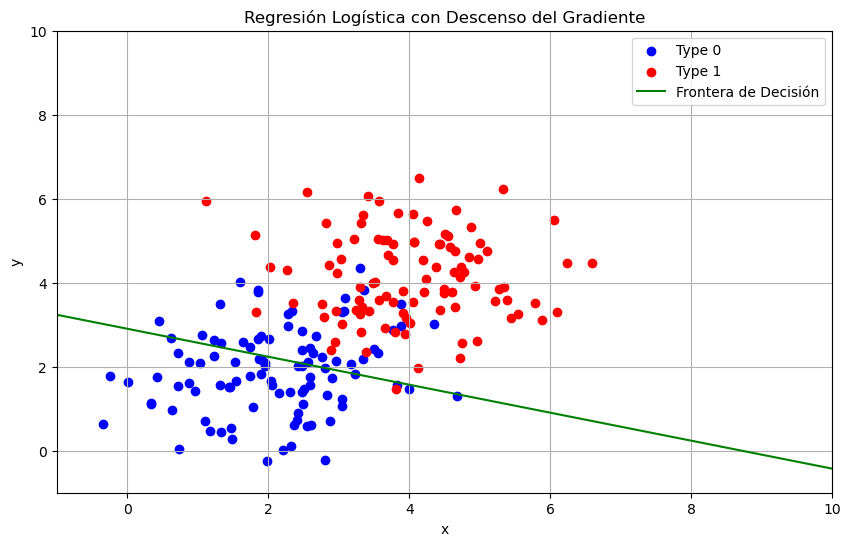

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generar datos
x = [4 + np.random.normal() for _ in range(100)] + [2 + np.random.normal() for _ in range(100)]
y = [4 + np.random.normal() for _ in range(100)] + [2 + np.random.normal() for _ in range(100)]
z = [1] * 100 + [0] * 100
data = pd.DataFrame({'x': x, 'y': y, 'Type': z})

# Función sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función de costo (log loss)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-1  # para evitar divisiones por cero
    cost = (1 / m) * ((-y.T @ np.log(h + epsilon)) - ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

# Gradiente de la función de costo
def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1 / m) * X.T @ (h - y)
    return grad

# Descenso del gradiente
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        theta -= learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Preparar los datos
X = data[['x', 'y']].values
y = data['Type'].values.reshape(-1, 1)
m, n = X.shape
X = np.hstack((np.ones((m, 1)), X))  # añadir columna de unos para el término de sesgo

# Inicializar parámetros
theta = np.zeros((n + 1, 1))

# Definir hiperparámetros
learning_rate = 0.01
iterations = 1000

# Ejecutar el descenso del gradiente
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(data[data['Type'] == 0]['x'], data[data['Type'] == 0]['y'], color='blue', label='Type 0')
plt.scatter(data[data['Type'] == 1]['x'], data[data['Type'] == 1]['y'], color='red', label='Type 1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Logística con Descenso del Gradiente')
plt.legend()

# Graficar la frontera de decisión
x_decision = np.linspace(-1, 10, 100)  # Generar puntos para x dentro del rango deseado
y_decision = - (theta[0] + theta[1] * x_decision) / theta[2]
plt.plot(x_decision, y_decision, label='Frontera de Decisión', color='green')
plt.legend()

# Establecer límites de los ejes
plt.xlim(-1, 10)
plt.ylim(-1, 10)

plt.grid(True)
plt.show()
